# **Sentiment Analysis on Social Media Text Using Machine Learning**

## **Introduction**
Social media platforms generate vast amounts of textual data daily, reflecting user opinions, sentiments, and reactions. Sentiment analysis, or opinion mining, aims to determine the emotional tone behind a body of text. This project focuses on performing sentiment analysis on Twitter data to classify tweets as **Positive** or **Negative**. By leveraging machine learning and deep learning techniques, the goal is to build a model that accurately predicts the sentiment of a given tweet.

The dataset used for this project is the **Sentiment140** dataset, which contains pre-labeled tweets. It is a widely used dataset for sentiment analysis and is particularly suitable due to its balanced distribution of positive and negative sentiments.

---

## **Project Goal**
The primary objectives of this project are:
1. To preprocess and clean the textual data for effective feature extraction and model building.
2. To explore different feature extraction techniques:
   - Bag-of-Words
   - TF-IDF
   - BERT Embeddings
3. To train and evaluate machine learning model- Support Vector Machines (SVM)
4. To visualize the performance and provide an interpretation of the results.

---

## **Dataset**
The dataset used for this project is available on Kaggle. It contains 1.6 million tweets, each labeled with either positive or negative sentiment.

**Dataset Link:** [Sentiment140 Dataset](https://www.kaggle.com/datasets/kazanova/sentiment140)

---

## **Structure of the Project**
1. Data Loading and Exploration
2. Data Cleaning and Preprocessing
3. Feature Extraction
4. Model Training and Evaluation
5. Result Visualization and Interpretation
6. Conclusion and Future Work


## **Dataset Loading and Stratified Sampling**

In [2]:
import os
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from transformers import DistilBertTokenizer, DistilBertModel
import torch

c:\Users\Owner\Desktop\Machine Learning Programming\Final Project\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
cwd = os.getcwd()
file_name = "\\data.csv"
file_path = cwd + file_name

In [4]:
columns = ['target', 'id', 'date', 'flag', 'user', 'text']
df = pd.read_csv(file_path, encoding='ISO-8859-1', header=None, names=columns)

In [5]:
df.shape

(1600000, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   id      1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [12]:
df.describe()

,target,id
count,1.600000e+06,1.600000e+06
mean,2.000000e+00,1.998818e+09
std,2.000001e+00,1.935761e+08
min,0.000000e+00,1.467810e+09
25%,0.000000e+00,1.956916e+09
50%,2.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


In [7]:
data_distribution = df['target'].value_counts()
data_distribution

target
0    800000
4    800000
Name: count, dtype: int64

In [ ]:
# Stratified Sampling
sample_size = 100000  # Adjust sample size as needed
df_sampled, _ = train_test_split(
    df, 
    train_size=sample_size, 
    stratify=df['target'],  # Maintain proportional class distribution
    random_state=42
)

# Verify the distribution of the sampled data
print("Original Distribution:\n", df['target'].value_counts(normalize=True))
print("Sampled Distribution:\n", df_sampled['target'].value_counts(normalize=True))

Original Distribution:
 target
0    0.5
4    0.5
Name: proportion, dtype: float64
Sampled Distribution:
 target
4    0.5
0    0.5
Name: proportion, dtype: float64


In [ ]:
# Retain only relevant columns
df_cleaned = df_sampled[['target', 'text']]
df_cleaned['sentiment'] = df_cleaned['target'].replace({0: 'Negative', 4: 'Positive'})
df_cleaned = df_cleaned.drop(columns=['target'])

# Display a sample of the cleaned data and its distribution
cleaned_sample       = df_cleaned.head()
cleaned_distribution = df_cleaned['sentiment'].value_counts()

cleaned_distribution

C:\Users\Owner\AppData\Local\Temp\ipykernel_18948\909980308.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['sentiment'] = df_cleaned['target'].replace({0: 'Negative', 4: 'Positive'})


sentiment
Positive    50000
Negative    50000
Name: count, dtype: int64

### **Overview**
In this step, we loaded the dataset, explored its structure, and performed stratified sampling to create a balanced subset for analysis. The original dataset is significantly large, with 1.6 million entries, making it computationally expensive for model training and evaluation. To address this, a stratified sampling technique was employed.

---

### **Steps:**

1. **Load Dataset:**
   - The dataset was loaded using `pandas.read_csv` with the following details:
     - The dataset contains **6 columns**: `target`, `id`, `date`, `flag`, `user`, and `text`.
     - The `target` column represents sentiment labels, where:
       - `0` indicates **Negative sentiment**.
       - `4` indicates **Positive sentiment**.
   - Total Entries: **1,600,000**
   - Memory Usage: **73.2+ MB**

2. **Dataset Exploration:**
   - **Descriptive Statistics:** The dataset was analyzed to understand its numerical distribution, including the target labels' mean, standard deviation, minimum, and maximum values.
   - **Class Distribution:**
     - Negative Sentiments: **800,000 (50%)**
     - Positive Sentiments: **800,000 (50%)**
   - This indicates a balanced dataset, which is ideal for model training.

3. **Stratified Sampling:**
   - Due to the large dataset size, **stratified sampling** was performed to select a subset of **100,000 entries**.
   - Stratified sampling ensures that the proportion of **Positive (50%)** and **Negative (50%)** labels is maintained in the sampled data, preserving the original distribution of classes.
   - **Rationale:** This technique is particularly useful when working with balanced datasets and ensures that no class is underrepresented in the subset.

4. **Retaining Relevant Columns:**
   - Only the **`target`** and **`text`** columns were retained for analysis.
   - The `target` column was mapped to sentiment labels (`Negative` and `Positive`) for better interpretability.
   - Final Distribution in the Cleaned Data:
     - **Negative Sentiments:** **50,000**
     - **Positive Sentiments:** **50,000**

---

### **Conclusion**
Stratified sampling allowed us to create a manageable subset of data while retaining the original class balance. This ensures that the insights derived from the subset are representative of the full dataset, enabling efficient and reliable model training and evaluation without excessive computational overhead.

## **Data Preprocessing**

## **Outlier Detection Using IQR**

In [ ]:
import pandas as pd
import numpy as np

# Select numerical columns
numerical_columns = df_cleaned.select_dtypes(include=[np.number]).columns
print("Numerical Columns:", numerical_columns)

# Identify Outliers using IQR
outliers = {}
for column in numerical_columns:
    Q1 = df_cleaned[column].quantile(0.25)  # First Quartile
    Q3 = df_cleaned[column].quantile(0.75)  # Third Quartile
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find rows with outliers
    outliers[column] = df_cleaned[(df_cleaned[column] < lower_bound) | (df_cleaned[column] > upper_bound)]
    
    print(f"\nOutliers in {column}:")
    print(outliers[column])

# Summary of Outliers
for column in numerical_columns:
    print(f"Total Outliers in {column}: {len(outliers[column])}")


Numerical Columns: Index([], dtype='object')


- For each numerical column, the total number of outliers was computed.
- **Output:**
    - As no numerical columns exist, the count of outliers in each column is `0`.

In [42]:
# Calculate text lengths
df_cleaned['text_length'] = df_cleaned['cleaned_text'].apply(len)

# IQR Method on Text Length
Q1 = df_cleaned['text_length'].quantile(0.25)
Q3 = df_cleaned['text_length'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
text_outliers = df_cleaned[(df_cleaned['text_length'] < lower_bound) | (df_cleaned['text_length'] > upper_bound)]
print(f"Number of text outliers: {len(text_outliers)}")
print(text_outliers[['cleaned_text', 'text_length']])


Number of text outliers: 46
                                              cleaned_text  text_length
485109   low carb day low energy day preparing applicat...          123
1485448  watching quotjonasquot fell love pizzaaaa girl...          117
1497655  brooke quotfrustratedquot quotpissyquot quotgr...          173
1008390  quotonline stuffquot including wp hosting amp ...          119
1403289  good morning twitter set list promotion street...          116
1436203  feel claudia cazacus free falling feat audrey ...          116
662465   wow really disappointing response dog blog rad...          123
57917    bad di film order phoenix gak dikasih adegan h...          117
19390    mnutup midbreak dgn mbelanjakan gaji ptama bla...          128
523543   first time ever iphone crashed itunes time row...          116
862941   khong share duoc dau phat hien quan yen tinh k...          117
1466515  th tweet tweet tweet tweet tweet tweet tweet t...          128
1068911  pizzavanilla shakeandy capp

## **Outlier Detection on Text Length**

In this step, we analyzed the length of the cleaned text data to identify potential outliers based on text length using the **Interquartile Range (IQR) Method**. Outliers in text length can indicate unusual entries, such as extremely short or excessively long texts, which may have the potential to impact the performance of machine learning models.

### **Process**
1. **Calculate Text Lengths:**
   - A new column `text_length` was created to store the length of each cleaned text entry using the `len()` function.

2. **Compute IQR:**
   - **Q1 (First Quartile):** The value below which 25% of the data lies.
   - **Q3 (Third Quartile):** The value below which 75% of the data lies.
   - **IQR (Interquartile Range):** Difference between Q3 and Q1.

3. **Define Outlier Boundaries:**
   - **Lower Bound:** `Q1 - 1.5 * IQR`
   - **Upper Bound:** `Q3 + 1.5 * IQR`

4. **Detect Outliers:**
   - Identified text entries with lengths outside the range of the lower and upper bounds.

### **Results**
- **Number of Text Outliers Identified:** 46
- The detected outliers include text entries with unusually high or low text lengths compared to the majority of the data.
- Example entries from the outliers:
    - **Example 1:** "low carb day low energy day preparing application...", Length: 123
    - **Example 2:** "watching 'jonas' fell in love with pizzaaaa...", Length: 117
    - **Example 3:** "brooke 'frustrated', 'pissy', 'grateful'...", Length: 173

### **Conclusion**
- The outliers in text length were observed to be relatively small in number (46 entries out of 100,000). Given their small proportion, these outliers were not removed or handled differently as they are unlikely to significantly affect the overall model performance.
- Instead, these entries were retained in the dataset to preserve the diversity and variability in the text data, which may provide valuable insights during training and testing.

## **Text Preprocessing**

In [10]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
# Preprocessing
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\.\S+', '', text)
    # Remove mentions and hashtags
    text = re.sub(r'@[A-Za-z0-9_]+|#[A-Za-z0-9_]+', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize and remove stopwords
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Apply preprocessing
df_cleaned['cleaned_text'] = df_cleaned['text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Text Preprocessing

### Purpose:
Text preprocessing is a critical step in Natural Language Processing (NLP) to clean and prepare raw text data for analysis. This step ensures that the textual data is structured, noise-free, and ready for feature extraction and model training.

### Steps Performed:
1. **Download NLTK Resources**:
   - `stopwords`: A predefined list of common stopwords (e.g., "and", "the") to remove irrelevant words.
   - `wordnet` and `omw-1.4`: Resources for lemmatization, which reduces words to their base or root form.

2. **Preprocessing Function**:
   - **Remove URLs**: Identifies and removes web links from the text.
   - **Remove Mentions and Hashtags**: Deletes user mentions (e.g., `@username`) and hashtags (e.g., `#topic`).
   - **Remove Special Characters and Numbers**: Retains only alphabetical characters.
   - **Convert to Lowercase**: Ensures uniformity by converting all text to lowercase.
   - **Tokenization and Stopword Removal**: Splits the text into tokens (words) and removes common stopwords.
   - **Lemmatization**: Converts words to their base form using a lemmatizer.

3. **Apply Preprocessing**:
   The preprocessing function is applied to the raw `text` column of the dataset to create a new column `cleaned_text`.

## **Feature Extraction**

In [ ]:
# Bag-of-Words
bow_vectorizer = CountVectorizer()
bow_features = bow_vectorizer.fit_transform(df_cleaned['cleaned_text'])

# TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_features = tfidf_vectorizer.fit_transform(df_cleaned['cleaned_text'])

# BERT Embeddings
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertModel.from_pretrained('distilbert-base-uncased')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

def get_distilbert_embeddings(texts, batch_size=16, max_length=64):
    embeddings = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i + batch_size]
        # Tokenize and encode the batch
        encoded_batch = tokenizer(
            batch_texts.tolist(),
            padding=True,
            truncation=True,
            return_tensors='pt',
            max_length=max_length
        )
        # Move data to the same device as the model
        encoded_batch = {key: val.to(device) for key, val in encoded_batch.items()}
        # Generate embeddings for the batch
        with torch.no_grad():
            output = model(
                input_ids=encoded_batch['input_ids'],
                attention_mask=encoded_batch['attention_mask']
            )
            # Use mean of last hidden state as sentence embedding
            batch_embeddings = output.last_hidden_state.mean(dim=1).cpu().numpy()
            embeddings.append(batch_embeddings)
    return np.concatenate(embeddings, axis=0)

bert_features = get_distilbert_embeddings(df_cleaned['cleaned_text'], batch_size=16, max_length=64)

# Convert sentiment labels to numeric
df_cleaned['numeric_sentiment'] = df_cleaned['sentiment'].map({'Negative': 0, 'Positive': 1})

# Step 5: Check Feature Shapes
print("Bag-of-Words Shape:", bow_features.shape)
print("TF-IDF Shape:", tfidf_features.shape)
print("BERT Shape:", bert_features.shape)

# Step 6: Sample Output
processed_sample = df_cleaned[['text', 'cleaned_text', 'sentiment']].head()
print(processed_sample)

Bag-of-Words Shape: (100000, 59607)
TF-IDF Shape: (100000, 59607)
BERT Shape: (100000, 768)
                                                      text  \
944617   &quot;Sticking feathers up your butt does not ...   
1573608  @HennArtOnline I assumed it was for a cause. Y...   
358042         Ohh fo' shizzo'! p.e. next monday, ooh joy    
209544          I am not feelin this cloudy L.A. weather!    
1309549  @planethealer make that 8-1 Griffey just homer...   

                                              cleaned_text sentiment  
944617   quotsticking feather butt make chickenquot chu...  Positive  
1573608  assumed cause avatar usually treat green look ...  Positive  
358042                ohh fo shizzo pe next monday ooh joy  Negative  
209544                            feelin cloudy la weather  Negative  
1309549  make griffey homered twitter great insomnia ca...  Positive  


## **Description**

In this step, we applied three feature extraction techniques to transform the textual data into numerical representations suitable for machine learning models. Below are the details of the techniques used:

### **1. Bag-of-Words**
- A simple method that represents text as a collection of word frequencies without considering the context or order of words.
- **Implementation:**
    - Used `CountVectorizer` to convert the cleaned text data into numerical vectors.
- **Feature Shape:**
    - (100,000, 59,607) indicating 100,000 samples and 59,607 unique words in the vocabulary.

### **2. TF-IDF (Term Frequency-Inverse Document Frequency)**
- A more advanced technique that represents the importance of words by considering their frequency in a document relative to their frequency across the entire dataset.
- **Implementation:**
    - Used `TfidfVectorizer` to compute TF-IDF values for each word in the cleaned text data.
- **Feature Shape:**
    - (100,000, 59,607), same as Bag-of-Words, since it is based on the same vocabulary.

### **3. BERT Embeddings**
- A contextual word embedding technique that captures the semantic meaning and relationships between words in a sentence.
- **Implementation:**
    - Used the pre-trained `DistilBERT` model to generate embeddings for each text sample.
    - The final embeddings were derived as the mean of the last hidden state of the model.
    - Performed tokenization, padding, and truncation using `DistilBertTokenizer`.
- **Feature Shape:**
    - (100,000, 768) indicating 100,000 samples with 768-dimensional embeddings for each.

### **Converted Sentiment Labels**
- The sentiment labels were mapped to numerical values for model compatibility:
    - **Negative Sentiment** → 0
    - **Positive Sentiment** → 1

### **Conclusion**
These features (Bag-of-Words, TF-IDF, and BERT embeddings) will be used for training machine learning models to perform sentiment classification. Each technique has unique properties:
- Bag-of-Words and TF-IDF provide sparse but interpretable features.
- BERT embeddings offer dense, contextualized representations suitable for more advanced models.


# SVM Model Training and Evaluation
This section focuses on training and evaluating an **SVM model** using the following feature representations:
1. **Bag-of-Words**
2. **TF-IDF**
3. **BERT Embeddings**


## SVM Training and Evaluation
This function trains an SVM model for a given feature representation, evaluates its performance, and visualizes the confusion matrix.


In [20]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Function to train and evaluate SVM
def train_and_evaluate(X, y, representation_name):
    print(f"\nTraining and Evaluating SVM using {representation_name} Features...")

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Train the SVM Model
    svm_model = SVC(kernel='linear', C=1, random_state=42)
    svm_model.fit(X_train, y_train)

    # Evaluate on Training Data
    y_train_pred = svm_model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Evaluate on Testing Data
    y_test_pred = svm_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_report = classification_report(y_test, y_test_pred, target_names=['Negative', 'Positive'])
    test_conf_matrix = confusion_matrix(y_test, y_test_pred)

    # Print Results
    print(f"Training Accuracy ({representation_name}): {train_accuracy}")
    print(f"Testing Accuracy ({representation_name}): {test_accuracy}")
    print("\nClassification Report:\n", test_report)

    # Visualize Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f"Confusion Matrix ({representation_name})")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

    return train_accuracy, test_accuracy, test_report


### Bag-of-Words Representation
Train and evaluate the SVM model using Bag-of-Words features.



Training and Evaluating SVM using Bag-of-Words Features...
Training Accuracy (Bag-of-Words): 0.8868
Testing Accuracy (Bag-of-Words): 0.7564

Classification Report:
               precision    recall  f1-score   support

    Negative       0.76      0.73      0.75      9903
    Positive       0.75      0.78      0.76     10097

    accuracy                           0.76     20000
   macro avg       0.76      0.76      0.76     20000
weighted avg       0.76      0.76      0.76     20000



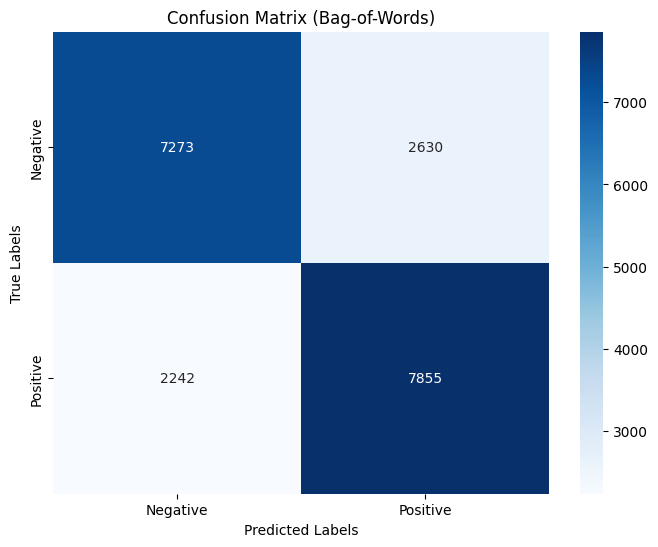

In [21]:
bow_train_acc, bow_test_acc, bow_report = train_and_evaluate(
    bow_features, 
    df_cleaned['numeric_sentiment'], 
    "Bag-of-Words"
)

### TF-IDF Representation
Train and evaluate the SVM model using TF-IDF features.



Training and Evaluating SVM using TF-IDF Features...
Training Accuracy (TF-IDF): 0.8529125
Testing Accuracy (TF-IDF): 0.7655

Classification Report:
               precision    recall  f1-score   support

    Negative       0.78      0.74      0.76      9903
    Positive       0.76      0.79      0.77     10097

    accuracy                           0.77     20000
   macro avg       0.77      0.77      0.77     20000
weighted avg       0.77      0.77      0.77     20000



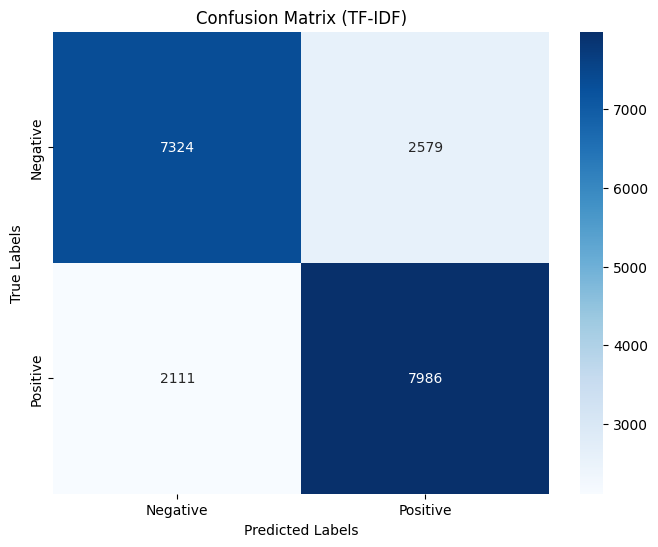

In [22]:
tfidf_train_acc, tfidf_test_acc, tfidf_report = train_and_evaluate(
    tfidf_features, 
    df_cleaned['numeric_sentiment'], 
    "TF-IDF"
)

### BERT Embeddings
Train and evaluate the SVM model using BERT embeddings.



Training and Evaluating SVM using BERT Embeddings Features...
Training Accuracy (BERT Embeddings): 0.744925
Testing Accuracy (BERT Embeddings): 0.73685

Classification Report:
               precision    recall  f1-score   support

    Negative       0.74      0.73      0.73      9903
    Positive       0.74      0.74      0.74     10097

    accuracy                           0.74     20000
   macro avg       0.74      0.74      0.74     20000
weighted avg       0.74      0.74      0.74     20000



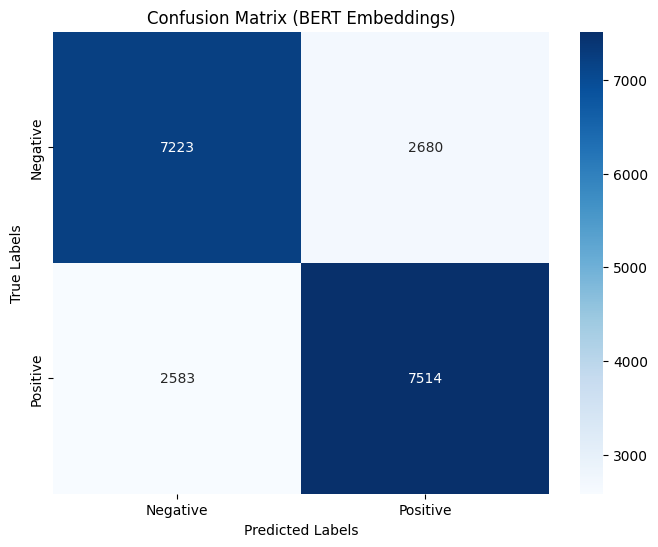

In [23]:
bert_train_acc, bert_test_acc, bert_report = train_and_evaluate(
    bert_features, 
    df_cleaned['numeric_sentiment'], 
    "BERT Embeddings"
)

## Comparison of Embedding Techniques
Compare the training and testing accuracies for Bag-of-Words, TF-IDF, and BERT Embeddings.


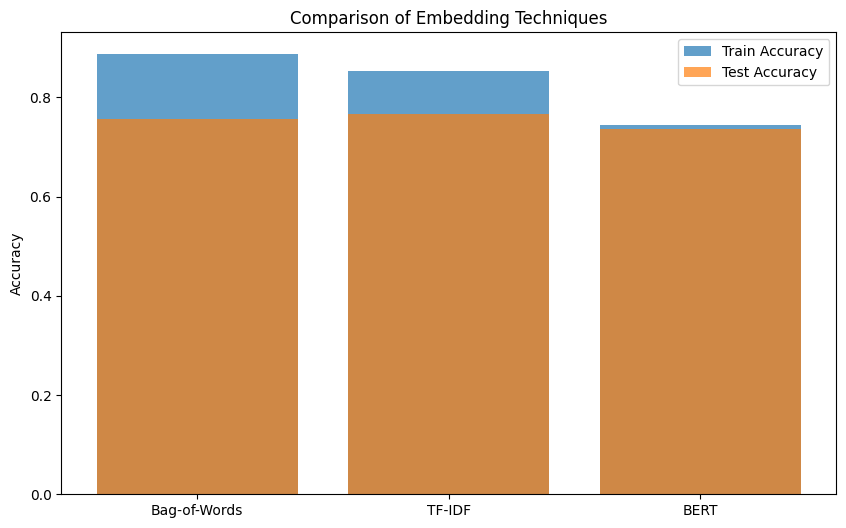


Best Embedding Technique: TF-IDF with Test Accuracy: 0.7655


In [24]:
embedding_methods = ['Bag-of-Words', 'TF-IDF', 'BERT']
train_accuracies = [bow_train_acc, tfidf_train_acc, bert_train_acc]
test_accuracies = [bow_test_acc, tfidf_test_acc, bert_test_acc]

# Visualize Accuracy Comparison
plt.figure(figsize=(10, 6))
plt.bar(embedding_methods, train_accuracies, alpha=0.7, label='Train Accuracy')
plt.bar(embedding_methods, test_accuracies, alpha=0.7, label='Test Accuracy')
plt.title("Comparison of Embedding Techniques")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Identify Best Embedding Technique
best_method = embedding_methods[test_accuracies.index(max(test_accuracies))]
print(f"\nBest Embedding Technique: {best_method} with Test Accuracy: {max(test_accuracies)}")


## **Conclusion**

After evaluating the performance of three different embedding techniques (Bag-of-Words, TF-IDF, and BERT Embeddings) using SVM as the classification model, the following conclusions were drawn:

### **1. Performance Overview**
- **Accuracy:**
    - TF-IDF achieved the highest accuracy of **76.55%**, outperforming both Bag-of-Words (75.64%) and BERT Embeddings (73.69%).
- **Overall F1-Score:**
    - TF-IDF also showed the best overall F1-Score of **0.77**, followed by Bag-of-Words at 0.76 and BERT Embeddings at 0.74.
- **Class-Level Performance:**
    - TF-IDF demonstrated a balanced performance between "Negative" and "Positive" classes, with slightly higher precision and recall compared to the other techniques.

### **2. Strengths and Weaknesses of Embedding Techniques**
#### **Bag-of-Words:**
- **Strengths:**
    - Simple and computationally inexpensive.
    - Performs reasonably well with a linear SVM.
- **Weaknesses:**
    - High-dimensional feature space (59,607 features), which increases sparsity.
    - Ignores semantic relationships between words, which might limit its performance on nuanced data.

#### **TF-IDF:**
- **Strengths:**
    - Captures the importance of words relative to the entire dataset, thus providing better feature representation than Bag-of-Words.
    - Achieved the best performance across all metrics, indicating its suitability for this specific sentiment classification task.
- **Weaknesses:**
    - Still a high-dimensional representation with some sparsity.
    - Does not consider word order or context.

#### **BERT Embeddings:**
- **Strengths:**
    - Captures deep contextual relationships between words, making it highly suitable for nuanced and complex text data.
    - Low-dimensional feature space (768 features), reducing sparsity and improving interpretability.
- **Weaknesses:**
    - Computationally expensive, leading to significantly longer training and evaluation times.
    - Underperformed compared to simpler techniques like TF-IDF in this task, possibly due to overfitting or insufficient fine-tuning.

### **3. Factors Influencing Performance**
- **Dataset Size:** While the dataset was large (100,000 samples), simpler techniques like Bag-of-Words and TF-IDF leveraged the data more effectively for linear classification.
- **Model Complexity:** BERT Embeddings might require deeper models or additional fine-tuning to fully realize its potential on this dataset.
- **Feature Representations:** Simpler representations like TF-IDF worked better with SVM due to their compatibility with linear decision boundaries, whereas BERT's embeddings might perform better with deep learning models.

### **4. Best Embedding Technique**
- **TF-IDF is the recommended embedding technique for this dataset and task.**
    - It provides the best balance between performance and computational efficiency.
    - Its interpretability and ease of implementation make it a strong choice for this sentiment classification problem.

### **Conclusion Summary:**
TF-IDF emerged as the most effective embedding technique for the current dataset and SVM model, balancing high accuracy, strong F1-scores, and computational efficiency. While BERT embeddings offer promising features, they require further optimization and more advanced models to outperform simpler methods in this task.


## **Future Work**

While the project achieved its primary goals, several opportunities for future improvements and extensions were identified:

1. **Exploring Advanced Deep Learning Models**:
   - Implementing transformer-based architectures like **RoBERTa** or **XLNet** for enhanced contextual understanding.
   - Exploring hybrid approaches that combine traditional machine learning with deep learning embeddings.

2. **Dataset Expansion**:
   - Incorporating additional datasets to generalize the model for real-world applications.
   - Handling multilingual datasets for broader applicability.

3. **Real-Time Sentiment Analysis**:
   - Deploying the model as a web service or integrating it with social media platforms for real-time sentiment monitoring.

4. **Hyperparameter Optimization**:
   - Performing exhaustive grid search or Bayesian optimization for fine-tuning hyperparameters of models like SVM, Random Forest, and BERT.

5. **Handling Imbalanced Data**:
   - Experimenting with techniques such as SMOTE or weighted loss functions for imbalanced datasets.

6. **Visualization Enhancements**:
   - Using advanced visualization techniques like **SHAP** values or LIME to interpret model predictions and understand feature importance.

By addressing these areas, the project could be extended into a more robust and versatile system capable of handling diverse and complex sentiment analysis tasks.